In [1]:
import sys
sys.path.append("../")
sys.path.append("../../")
import os
import das
import logging
import importlib
from das.ArchitectureSearch.Evaluator.BaseEvaluator import BaseEvaluator

logger = logging.getLogger(das.logger_name)
util = importlib.import_module('util')
extract_key_value = getattr(util, 'extract_key_value')

CLASSIFICATION = ['adult', 'letter', 'digits', 'wine', 'iris', 'breast_cancer', 'dexter', 'gisette', 'imdb', 'yeast']
REGRESSION = ['mg', 'airfoil', 'space_ga', 'abalone', 'cadata', 'superconduct', 'cpusmall']


def extract_information_from_filename(filename):
	parts = filename.split('_')
	info = dict()
	info['hostname'] = parts[0]
	info['search_algos'] = parts[1]
	info['data_name'] = parts[2]
	info['rng'] = parts[3][1:]
	info['time_str'] = parts[-1]
	for i in range(4, len(parts)-1, 2):
		key = parts[i]
		value = parts[i+1]
		info[key] = value

	return info


def show_learning_curve_v2(hostname='slave',
	                       search_algos='*',
	                       data_name='digits',
	                       rng='*',
	                       budget_type='*',
	                       total_budget='*',
	                       other_info_str=None,
	                       time_str='*',
                           **kwargs):
	learning_curves = []
	plus_info = {}
	if other_info_str:
		for argv_str in other_info_str.split(","):
			key, value = extract_key_value(argv_str, value_type='auto')
			plus_info[key] = value

	if data_name in CLASSIFICATION:
		time_with = 'val_accuracy_score'
	else:
		time_with = 'val_r2_score'

	for file_name in os.listdir("./lcvs"):
		# print(file_name)
		if ".lcv" not in file_name:
			continue
		info = extract_information_from_filename(file_name)
		if (hostname == '*' or hostname in info['hostname'])\
			and (search_algos == '*' or search_algos in info['search_algos'])\
			and (data_name == '*' or data_name == info['data_name'])\
			and (rng == '*' or rng == info['rng'])\
			and (budget_type == '*' or budget_type == info['budget_type'])\
			and (total_budget == '*' or total_budget == info['total_budget'])\
			and (time_str == '*' or time_str == info['time_str']):

			learning_curve = BaseEvaluator.load_learning_curve(file_name, base_dir="./lcvs")
			time, objective = BaseEvaluator.extract_time_objective_from_lcv(learning_curve, time_with)
			learning_curves.append(("{}: {:.4f}".format(file_name[:-4], objective[-1]), learning_curve))

	title = data_name

	BaseEvaluator.plot_learning_curves(title=title,
	                                   learning_curves=learning_curves,
	                                   time_with=time_with,
	                                   **kwargs)


## mg

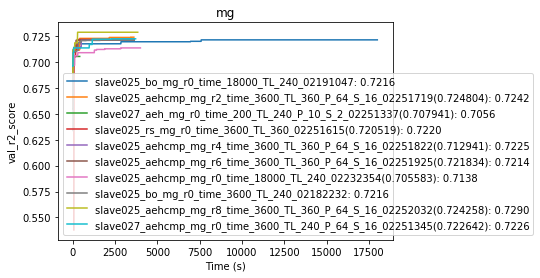

In [33]:
show_learning_curve_v2(data_name='mg')

## airfoil

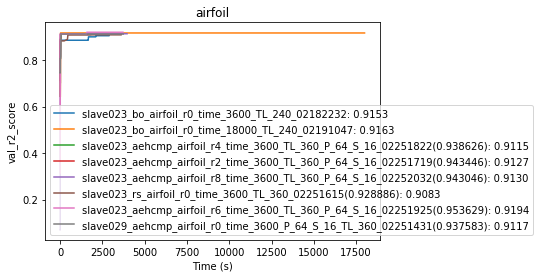

In [34]:
show_learning_curve_v2(data_name='airfoil')

## adult

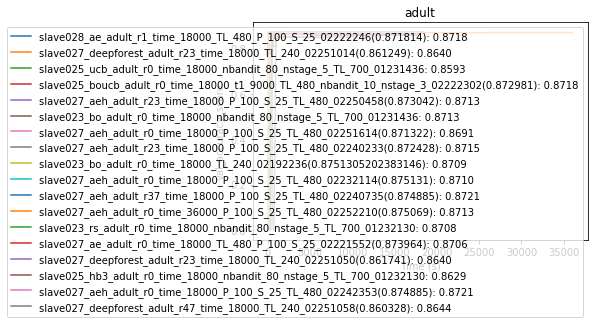

In [35]:
show_learning_curve_v2(data_name='adult')

## letter

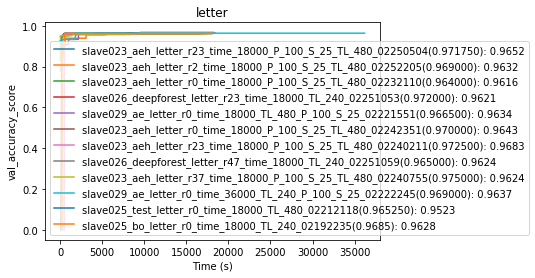

In [36]:
show_learning_curve_v2(data_name='letter')

## yeast

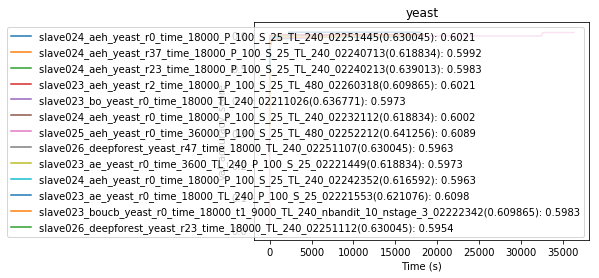

In [37]:
show_learning_curve_v2(data_name='yeast')

## dexter

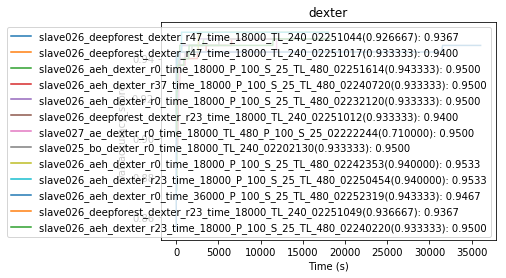

In [38]:
show_learning_curve_v2(data_name='dexter')

## gisette

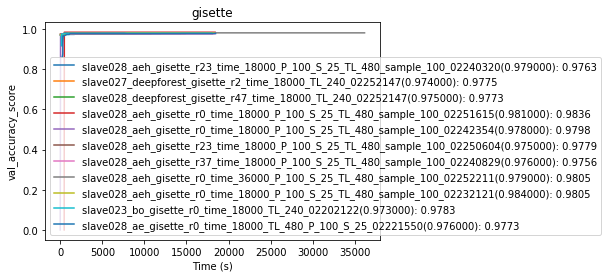

In [39]:
show_learning_curve_v2(data_name='gisette')

## imdb

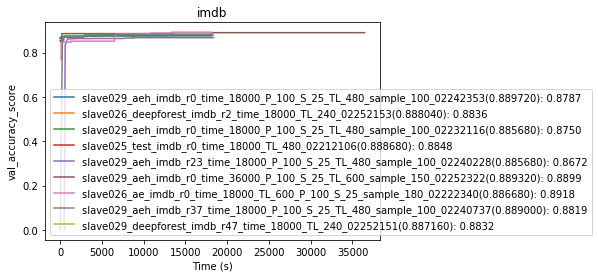

In [41]:
show_learning_curve_v2(data_name='imdb')